In [54]:
#Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

In [55]:
#Reading the CSV file by letting user choose file from local computer
from tkinter import *
from tkinter.filedialog import askopenfilename

In [56]:
file_meal = askopenfilename()
df_meal = pd.read_csv(file_meal,header = 0)
df_meal.head(3)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai


In [57]:
file_center = askopenfilename()
df_center = pd.read_csv(file_center,header=0)
df_center.head(3)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0


In [58]:
file_food = askopenfilename()
df_food = pd.read_csv(file_food,header=0)
df_food.head(3)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189


In [59]:
#Merging all the data frames into one
df = pd.merge(df_food,df_center, on ='center_id')
df = pd.merge(df,df_meal,on='meal_id')

In [60]:
df.head(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
5,1493612,6,55,1885,146.53,146.53,0,0,285,647,56,TYPE_C,2.0,Beverages,Thai
6,1110832,7,55,1885,145.53,146.53,0,0,148,647,56,TYPE_C,2.0,Beverages,Thai
7,1461167,8,55,1885,146.53,145.53,0,0,135,647,56,TYPE_C,2.0,Beverages,Thai
8,1102364,9,55,1885,134.83,134.83,0,0,175,647,56,TYPE_C,2.0,Beverages,Thai
9,1018130,10,55,1885,144.56,143.56,0,0,175,647,56,TYPE_C,2.0,Beverages,Thai


In [71]:
#Line Plot and Subplots using matplotlib
#new revenue column 
df['revenue'] = df.apply(lambda x: x.checkout_price*x.num_orders,axis=1) 

#new month column 
df['month'] = df['week'].apply(lambda x: x//4) 

#list to store month-wise revenue 
month=[] 
month_order=[] 

for i in range(max(df['month'])):
    month.append(i) 
    month_order.append(df[df['month']==i].revenue.sum()) 
    
#list to store week-wise revenue 
week=[] 
week_order=[] 

for i in range(max(df['week'])): 
    week.append(i) 
    week_order.append(df[df['week']==i].revenue.sum())

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

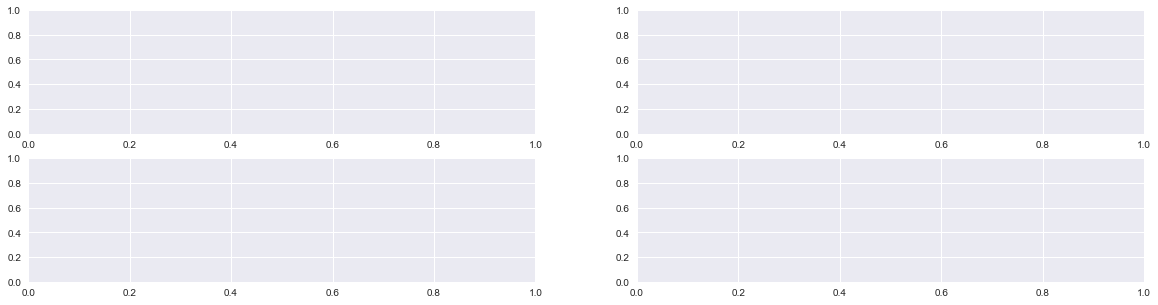

In [74]:
#subplots returns a Figure and an Axes object 
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,5)) #Creates the area on which the plots will be shown.

#Axes for first plot
ax[0].plot(week,week_order) 
#Adding legends
ax[0].set_xlabel('Week') #xlabel legend
ax[0].set_ylabel('Revenue') #ylabel legend
ax[0].set_title('Weekly income') #Title of the plot

#Axes for second plot
ax[1].plot(month,month_order) 
ax[1].set_xlabel('Month') #xlabel legend
ax[1].set_ylabel('Revenue') #ylabel legend
ax[1].set_title('Monthly income') #Title of the plot

plt.savefig('output1.png', #Name of the image
            dpi=300, #Number of dots per inch to help improve picture quality
            bbox_inches='tight' #Proper fit the saved figure
           )

plt.show(); #output the plot on the console